In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [2]:
# loading the csv file into pandas DataFrame
file_path = r"C:\Users\shame\3D Objects\Jupyter\heart_disease_270.csv"
heart_dataset=pd.read_csv(file_path)

In [3]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [4]:
heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1


In [5]:
heart_dataset.shape

(270, 14)

In [6]:
# getting some info about the data
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [7]:
# Checking for missing value
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Statistical measures about the data
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


target
0    150
1    120
Name: count, dtype: int64


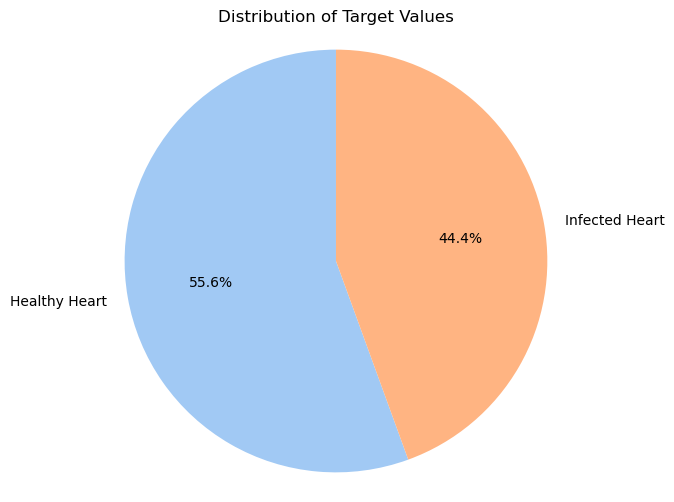

In [9]:
# checking the distribution of target value 
target_counts = heart_dataset['target'].value_counts()

print(target_counts)

# Mapping 1 -> 'Infected Heart' and 0 -> 'Healthy Heart'
labels = target_counts.index.map({1: 'Infected Heart', 0: 'Healthy Heart'})

# Plot pie chart for target value distribution
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Target Values')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

In [10]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [11]:
print("Dataset information")
print("Age           (age): Age in years.")
print("Sex           (sex): Sex (1=male; 0=female).")
print("Cp             (cp): Chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).")
print("Trestbps (trestbps): Resting blood pressure in mm Hg on admission to the hospital.")
print("Chol         (chol): Serum cholesterol in mg/dl.")
print("fbs           (fbs): Fasting blood sugar > 120 mg/dl (1=true; 0=false).")
print("Restecg   (restecg): Resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).")
print("Thalach   (thalach): Maximum heart rate achieved. Exang: exercise-induced angina (1=yes; 0=no).")
print("Oldpeak   (oldpeak): ST depression induced by exercise relative to rest.")
print("Slope       (slope): The slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).")
print("Ca             (ca): Number of major vessels (0–3) colored by fluorosopy.")
print("Thal         (thal): Thalassemia (3=normal; 6=fixed defect; 7=reversable defect).")
print("Target     (target): Heart disease (1=no, 2=yes) ")

Dataset information
Age           (age): Age in years.
Sex           (sex): Sex (1=male; 0=female).
Cp             (cp): Chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).
Trestbps (trestbps): Resting blood pressure in mm Hg on admission to the hospital.
Chol         (chol): Serum cholesterol in mg/dl.
fbs           (fbs): Fasting blood sugar > 120 mg/dl (1=true; 0=false).
Restecg   (restecg): Resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).
Thalach   (thalach): Maximum heart rate achieved. Exang: exercise-induced angina (1=yes; 0=no).
Oldpeak   (oldpeak): ST depression induced by exercise relative to rest.
Slope       (slope): The slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).
Ca             (ca): Number of major vessels (0–3) colored by fluorosopy.
Thal         (thal): Thalassemia (3=normal; 6=fixed defect; 7=reversable defe

<Axes: >

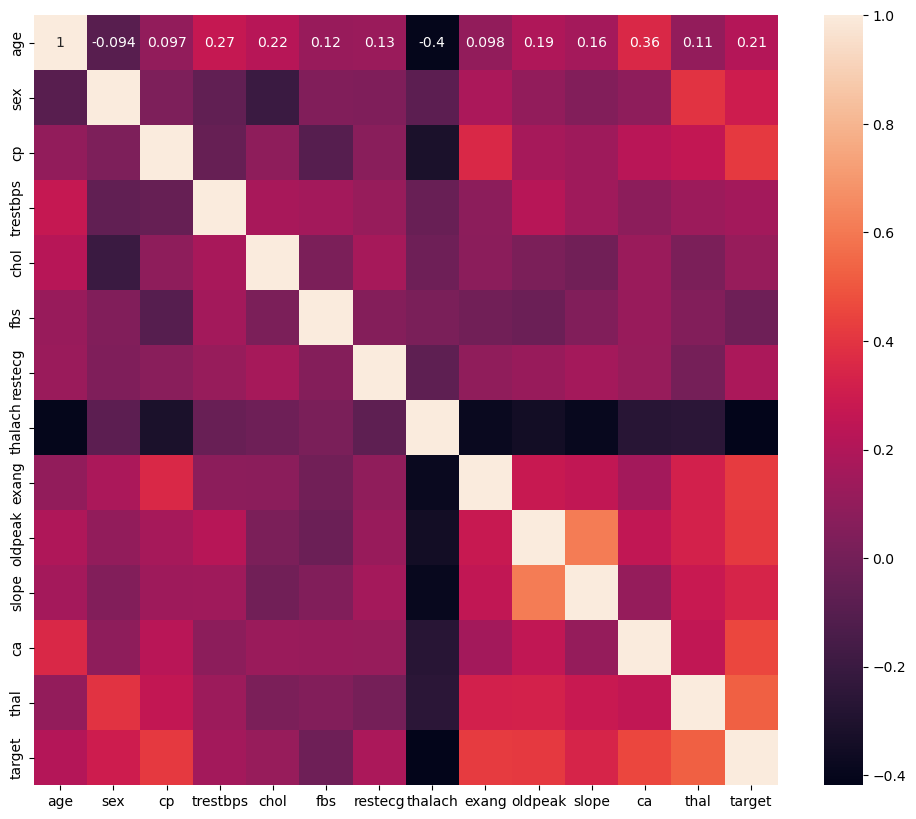

In [12]:
correlation = heart_dataset.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels=correlation.columns,annot=True)

C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

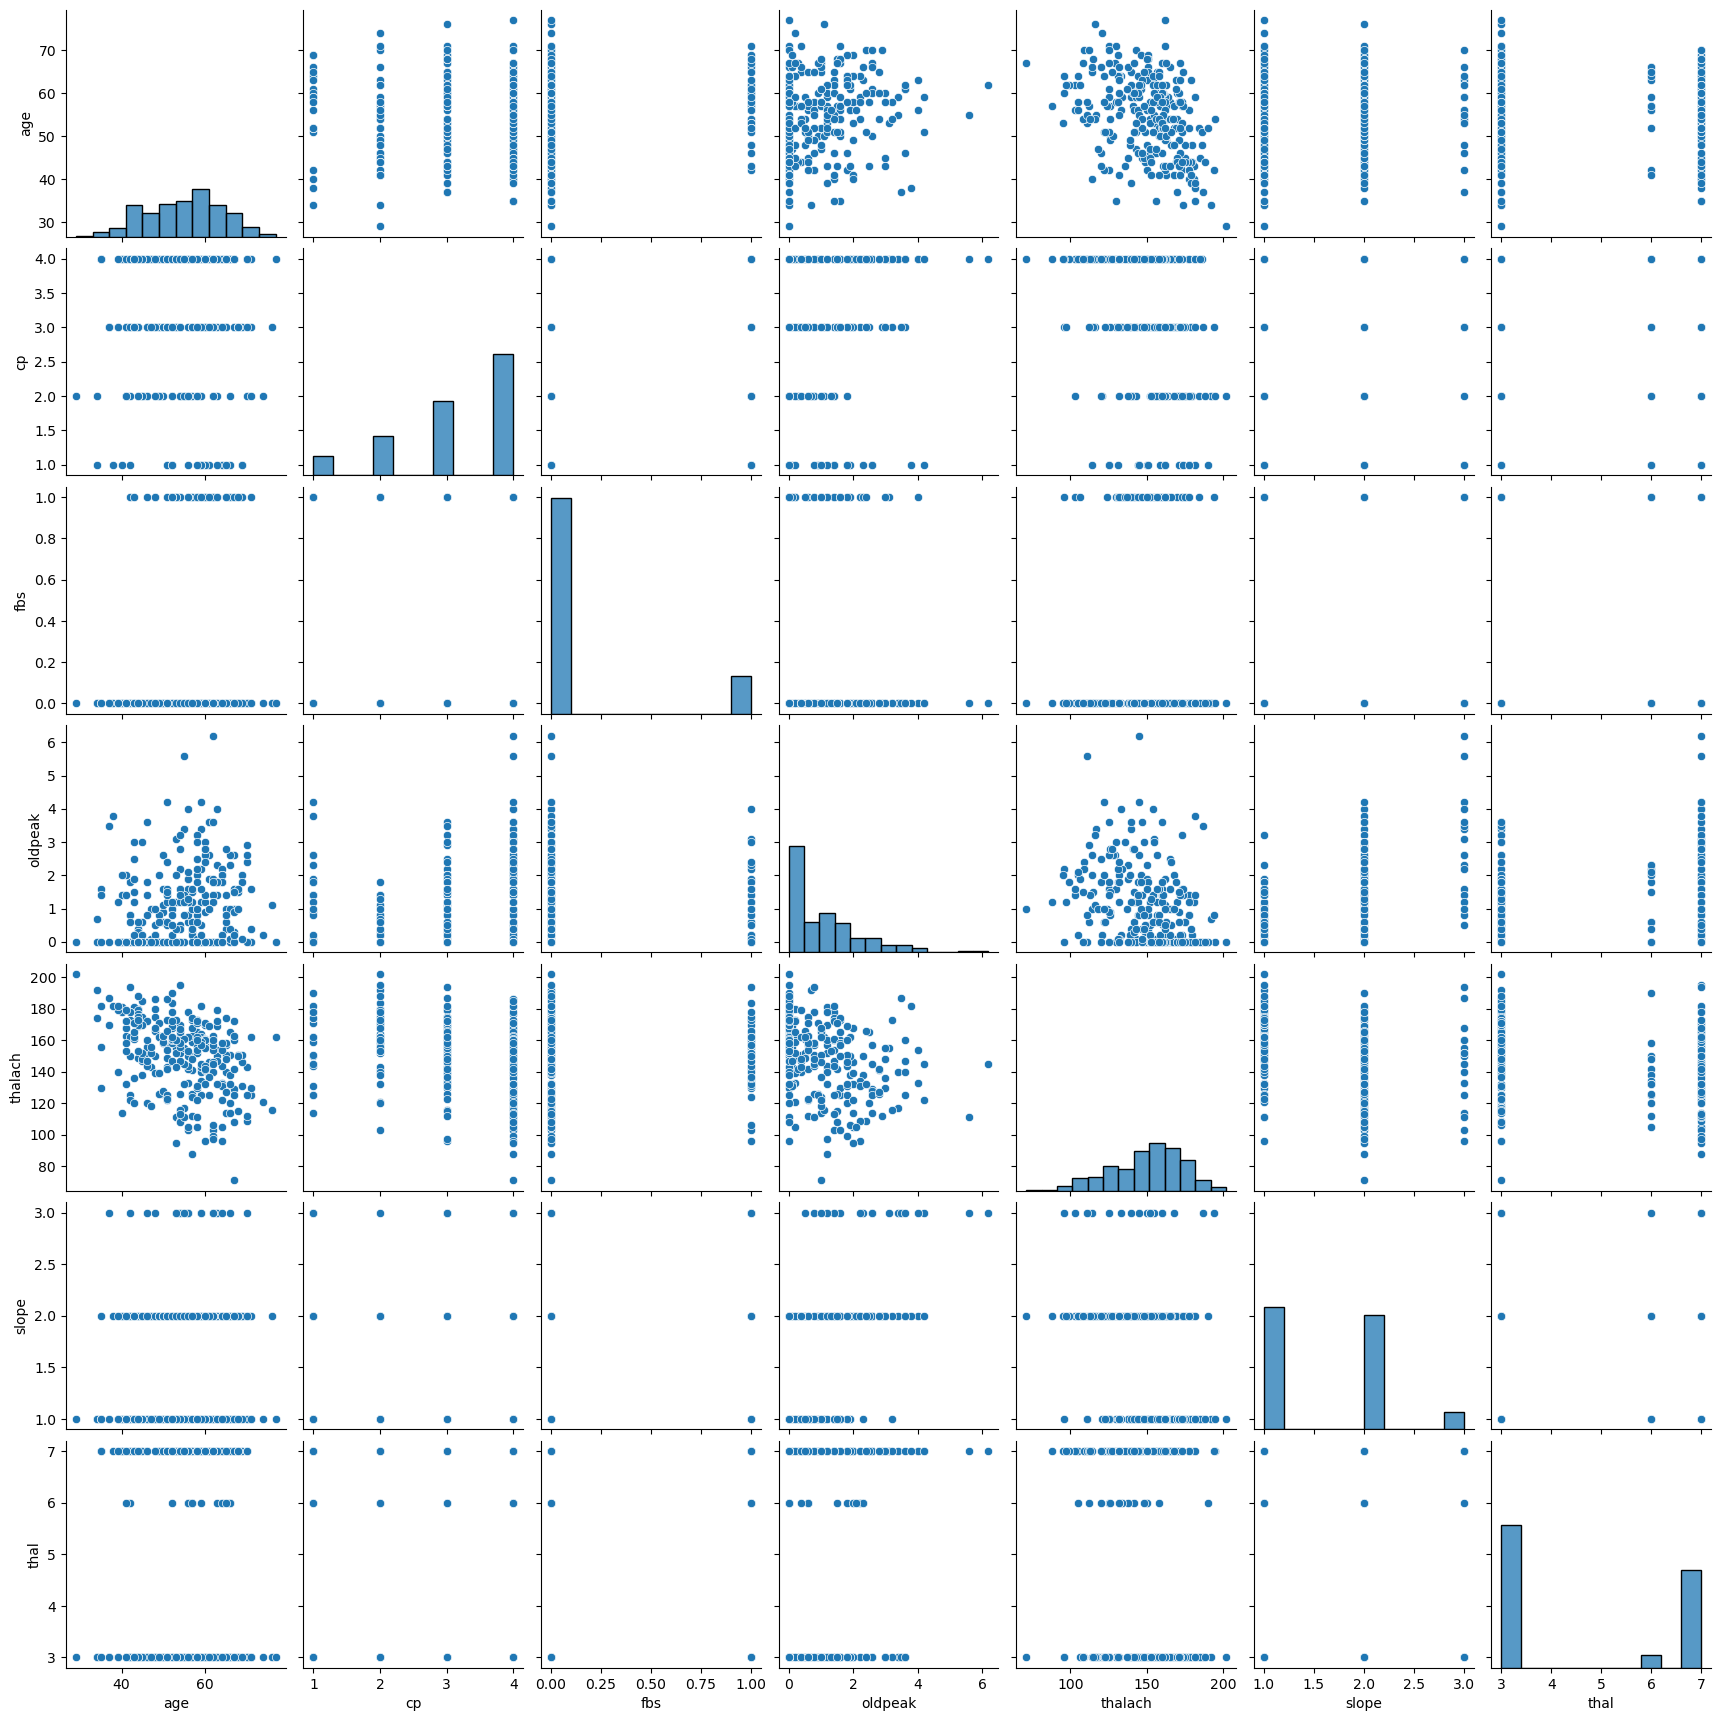

In [13]:
dataset_Pair_Plot = heart_dataset[['age','cp','fbs','oldpeak','thalach','slope','thal']]
print(sns.pairplot(dataset_Pair_Plot))

## Splitting the Feature and Target

In [14]:
X = heart_dataset.drop(columns=['target'],axis=1)
Y = heart_dataset['target']

In [15]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [16]:
hdp_model=LogisticRegression()
# training the LogisticRegression model with training data
hdp_model.fit(X_train.values, Y_train)

C:\Users\shame\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# accuracy on training data
X_train_prediction=hdp_model.predict(X_train.values)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8703703703703703


In [18]:
# accuracy on test data
X_test_prediction=hdp_model.predict(X_test.values)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.8333333333333334


In [19]:
# Generate classification report for training data
train_classification_report = classification_report(Y_train, X_train_prediction)
print("Classification Report for Training Data:\n", train_classification_report)

# Generate classification report for test data
test_classification_report = classification_report(Y_test, X_test_prediction)
print("Classification Report for Test Data:\n", test_classification_report)

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       120
           1       0.88      0.82      0.85        96

    accuracy                           0.87       216
   macro avg       0.87      0.87      0.87       216
weighted avg       0.87      0.87      0.87       216

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.86      0.75      0.80        24

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.83        54
weighted avg       0.84      0.83      0.83        54



AUC for Test Data: 0.9
Confusion Matrix:
 [[27  3]
 [ 6 18]]


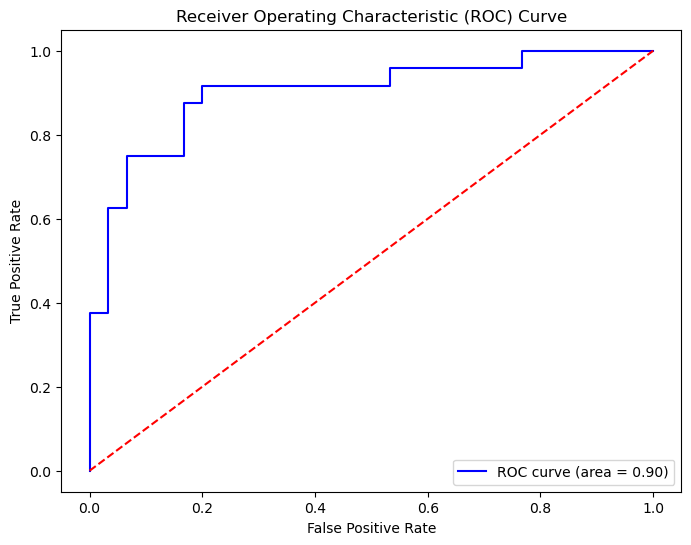

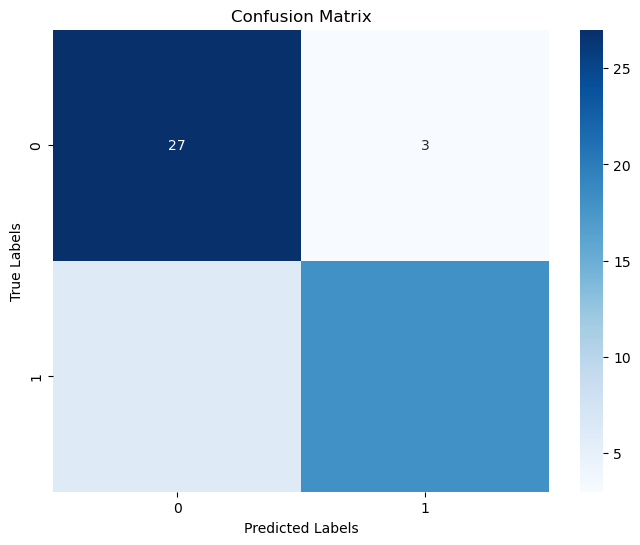

In [20]:
# Probabilities for positive class (class 1) for the test data
Y_test_prob = hdp_model.predict_proba(X_test.values)[:, 1]

# Compute AUC value
test_auc = roc_auc_score(Y_test, Y_test_prob)
print("AUC for Test Data:", test_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)


# Confusion Matrix for test data
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
def tune_logistic_regression(file_path, target_column):
     # Read the dataset into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the Logistic Regression model
    model = LogisticRegression()

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [100, 500, 1000]
    }
     # Define the scoring metrics
    scoring = {
        'MSE': make_scorer(mean_squared_error, greater_is_better=False),
        'R2': make_scorer(r2_score)
    }

    # Perform grid search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Evaluate the best model on the test set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return best_model, best_params, best_score, mse, r2


target_column = 'target'  # Replace with the actual name of your target column
best_model, best_params, best_score, test_mse, test_r2 = tune_logistic_regression(file_path, target_column)

print(f"Best Parameters: {best_params}")
print(f"Best R2 Score: {best_score}")
print(f"Test Set MSE: {test_mse}")
print(f"Test Set R2: {test_r2}")

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best R2 Score: 0.3662623951182303
Test Set MSE: 0.09259259259259259
Test Set R2: 0.6103896103896105


C:\Users\shame\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
375 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shame\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shame\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shame\anaconda3\Lib\site-packages\sklearn\linear_model\_

In [22]:
best_params = {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074
Accuracy: 0.9074074074074074
Confusion Matrix:
[[32  1]
 [ 4 17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



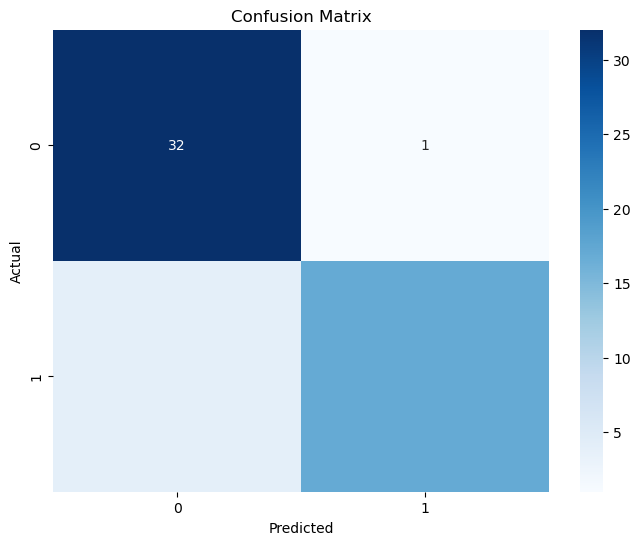

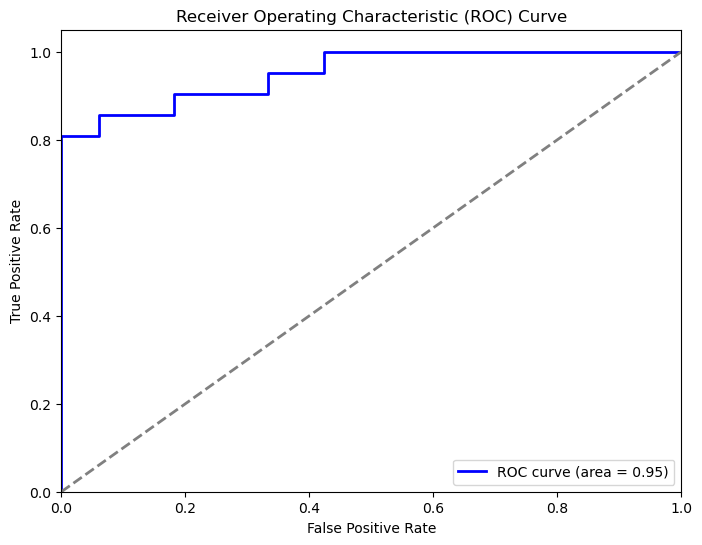

C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


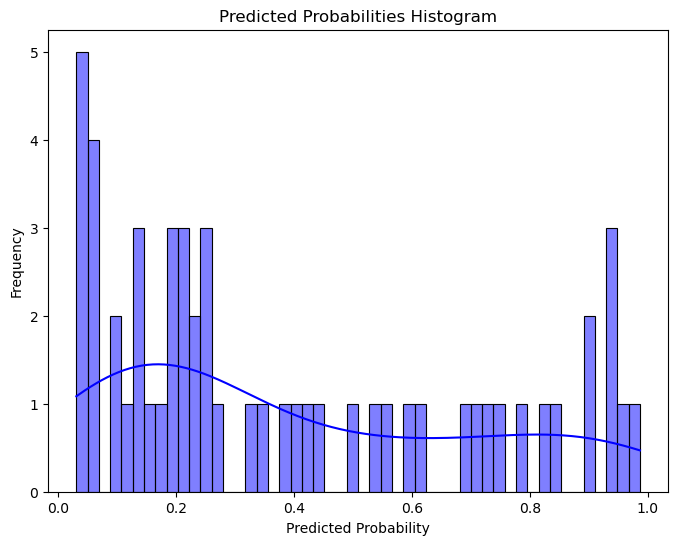

In [23]:
def logistic_regression_with_best_params(file_path, target_column, best_params):
    # Read the dataset into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the Logistic Regression model with the best parameters
    model = LogisticRegression(**best_params)
    
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Evaluate the model
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Print evaluation results
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Plot Predicted Probabilities
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred_proba, bins=50, kde=True, color='blue')
    plt.title('Predicted Probabilities Histogram')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.show()

logistic_regression_with_best_params(file_path, target_column, best_params)

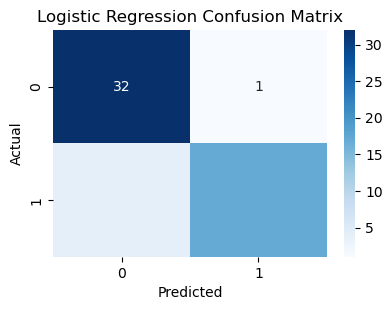

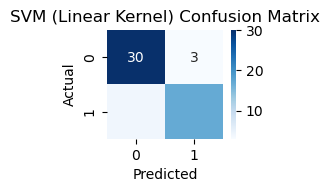

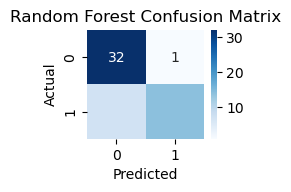

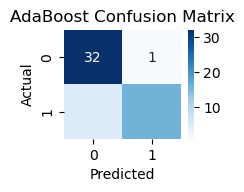

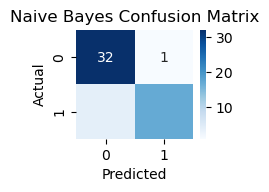

<Figure size 640x480 with 0 Axes>

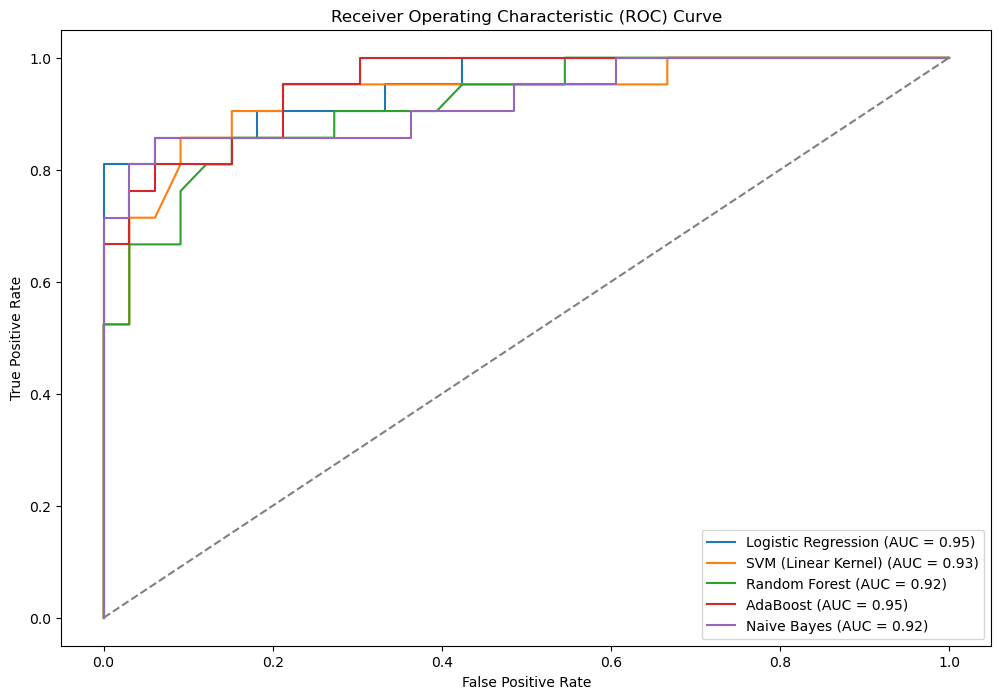

Results for Logistic Regression:
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074
Confusion Matrix (Testing Set):
[[32  1]
 [ 4 17]]
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54

Results for SVM (Linear Kernel):
Training Accuracy: 0.8472222222222222
Testing Accuracy: 0.8703703703703703
Confusion Matrix (Testing Set):
[[30  3]
 [ 4 17]]
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.85      0.81      0.83        21

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.86        54
weighted 

In [24]:
def train_evaluate_compare(file_path, target_column, best_log_reg_params):
    # Read the dataset into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the models
    models = {
        "Logistic Regression": LogisticRegression(C=best_log_reg_params['C'], max_iter=best_log_reg_params['max_iter'],
                                                  penalty=best_log_reg_params['penalty'], solver=best_log_reg_params['solver']),
        "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Naive Bayes": GaussianNB()
    }

    results = {}

    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # Calculate ROC AUC
        if hasattr(model, "predict_proba"):
            y_train_prob = model.predict_proba(X_train)[:, 1]
            y_test_prob = model.predict_proba(X_test)[:, 1]
        else:  # For SVM which doesn't have predict_proba by default
            y_train_prob = model.decision_function(X_train)
            y_test_prob = model.decision_function(X_test)
        
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
        auc_train = roc_auc_score(y_train, y_train_prob)
        auc_test = roc_auc_score(y_test, y_test_prob)
        
        results[name] = {
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy,
            "fpr_train": fpr_train,
            "tpr_train": tpr_train,
            "fpr_test": fpr_test,
            "tpr_test": tpr_test,
            "auc_train": auc_train,
            "auc_test": auc_test,
            "conf_matrix_test": confusion_matrix(y_test, y_test_pred),
            "class_report_test": classification_report(y_test, y_test_pred)
        }

    # Plot Confusion Matrix
    plt.figure(figsize=(15, 10))
    for i, (name, result) in enumerate(results.items(), start=1):
        plt.subplot(3, 3, i)
        sns.heatmap(result["conf_matrix_test"], annot=True, fmt="d", cmap="Blues")
        plt.title(f'{name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    plt.tight_layout()
    plt.show()

    # Plot ROC Curves
    plt.figure(figsize=(12, 8))
    for name, result in results.items():
        plt.plot(result["fpr_test"], result["tpr_test"], label=f'{name} (AUC = {result["auc_test"]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Print evaluation results
    for name, result in results.items():
        print(f"Results for {name}:")
        print(f'Training Accuracy: {result["train_accuracy"]}')
        print(f'Testing Accuracy: {result["test_accuracy"]}')
        print('Confusion Matrix (Testing Set):')
        print(result["conf_matrix_test"])
        print('Classification Report (Testing Set):')
        print(result["class_report_test"])
        print("="*60)
    
    # Determine the best model based on test accuracy
    best_model_name = max(results, key=lambda name: results[name]["test_accuracy"])
    best_model_accuracy = results[best_model_name]["test_accuracy"]
    print(f"The best model is {best_model_name} with a testing accuracy of {best_model_accuracy:.2f}")

    return results, best_model_name, best_model_accuracy

best_log_reg_params = {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
results, best_model_name, best_model_accuracy = train_evaluate_compare(file_path, target_column, best_log_reg_params)

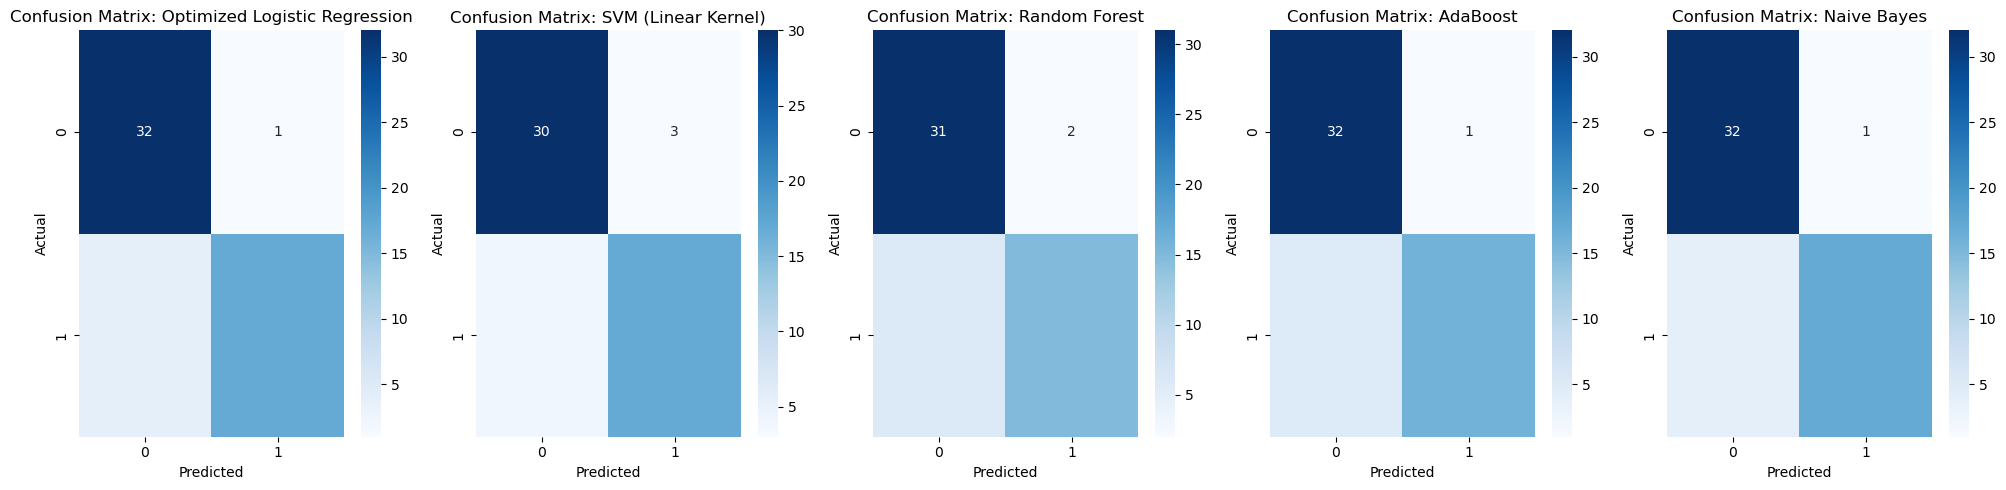

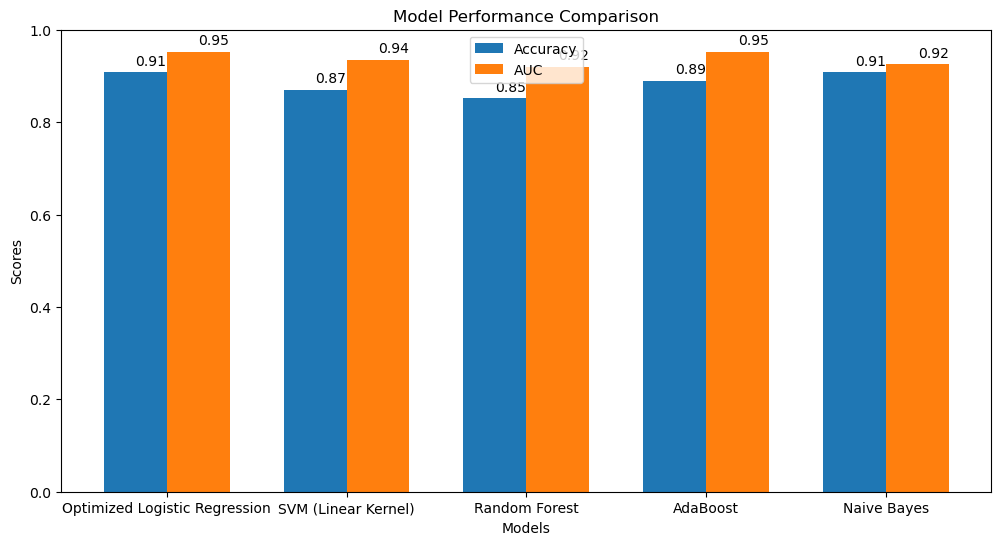

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Function to load and split the dataset
def load_and_split_data(file_path, target_column, test_size=0.2, random_state=42):
    df = pd.read_csv(file_path)
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Function to train and compare different models
def train_evaluate_compare(X_train, X_test, y_train, y_test, best_log_reg_params):
    models = {
        "Optimized Logistic Regression": LogisticRegression(**best_log_reg_params),
        "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
        "Random Forest": RandomForestClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Naive Bayes": GaussianNB()
    }

    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_auc = roc_auc_score(y_test, y_test_proba)
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        
        results[name] = {
            "model": model,
            "test_accuracy": test_accuracy,
            "test_auc": test_auc,
            "conf_matrix": conf_matrix
        }
    
    return results

# Function to plot confusion matrices
def plot_confusion_matrices(results):
    fig, axes = plt.subplots(1, len(results), figsize=(20, 5))
    for idx, (name, res) in enumerate(results.items()):
        sns.heatmap(res['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix: {name}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Function to plot a bar chart for model performance
def plot_performance_bar_chart(results):
    models = list(results.keys())
    accuracy = [res['test_accuracy'] for res in results.values()]
    auc_scores = [res['test_auc'] for res in results.values()]

    # Plot bar chart
    x = np.arange(len(models))
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
    bars2 = ax.bar(x + width/2, auc_scores, width, label='AUC')

    # Add some text for labels, title, and custom x-axis tick labels, etc.
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()

    # Add labels to bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points", ha='left', va='bottom')

    add_labels(bars1)
    add_labels(bars2)

    plt.show()

# Path to dataset
file_path = r"C:\Users\shame\3D Objects\Jupyter\heart_disease_270.csv"
target_column = 'target'

# Load and split data
X_train, X_test, y_train, y_test = load_and_split_data(file_path, target_column)

# Assuming best_params is already obtained from previous steps
best_params = {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

# Train and compare models
results = train_evaluate_compare(X_train, X_test, y_train, y_test, best_params)

# Plot confusion matrices
plot_confusion_matrices(results)

# Plot performance bar chart
plot_performance_bar_chart(results)


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Function to plot heatmap of confusion matrix for each model
def plot_confusion_matrix(models, X_test, Y_test):
    fig, axes = plt.subplots(1, len(models), figsize=(20, 5))
    
    for idx, (name, model) in enumerate(models.items()):
        Y_pred = model.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
        axes[idx].set_title(f'Confusion Matrix - {name}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

# Function to plot bar chart for model accuracy and AUC comparison
def plot_model_performance(results):
    models = list(results.keys())
    accuracies = [results[model]['test_accuracy'] for model in models]
    aucs = [results[model]['test_auc'] for model in models]

    x = np.arange(len(models))  # label locations

    # Plotting accuracy and AUC bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.35
    bar1 = ax.bar(x - bar_width / 2, accuracies, bar_width, label='Accuracy', color='skyblue')
    bar2 = ax.bar(x + bar_width / 2, aucs, bar_width, label='AUC', color='lightgreen')

    # Adding labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Model Accuracy and AUC Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.show()

# Example usage of the functions after training the models
results, best_model_name, best_model_accuracy = train_evaluate_compare(X_train, X_test, Y_train, Y_test, best_params)

# Plot confusion matrices for each model
plot_confusion_matrix(models, X_test, Y_test)

# Plot bar chart for model performance comparison
plot_model_performance(results)


ValueError: too many values to unpack (expected 3)